# Life Cycle of Machine Learning  

### 1. Understanding Problem Statement  
### 2. Data Collection  
### 3. Data Checks to Perform  
### 4. Exploratory Data Analysis (EDA)  
### 5. Data Pre-processing  
### 6. Model Training  
### 7. Choosing the Best Model  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### form the above data we can see that
#### means of all 3 are closer
#### standard deviation is closer
#### minimum value has a variation(0,10,17)

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print('categorries in gender variable:   ')
print(df['gender'].unique())

print('categorries in race_ethnicity variable:   ')
print(df['race_ethnicity'].unique())

print('categorries in parental_level_of_education variable:   ')
print(df['parental_level_of_education'].unique())

print('categorries in lunch variable:   ')
print(df['lunch'].unique())

print('categorries in test_preparation_course variable:   ')
print(df['test_preparation_course'].unique())

categorries in gender variable:   
['female' 'male']
categorries in race_ethnicity variable:   
['group B' 'group C' 'group A' 'group D' 'group E']
categorries in parental_level_of_education variable:   
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categorries in lunch variable:   
['standard' 'free/reduced']
categorries in test_preparation_course variable:   
['none' 'completed']


In [12]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('we have {} numerical features and those are {}'.format(len(numerical_features),numerical_features))
print('we have {} categorical features and those are {}'.format(len(categorical_features),categorical_features))



we have 3 numerical features and those are ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features and those are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### now i will add the output total score and average score

In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average']=df['total_score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [15]:
reading_full=df[df['reading_score']==100]['Average'].count()
math_full=df[df['math_score']==100]['Average'].count()
writing_full=df[df['writing_score']==100]['Average'].count()
print(reading_full)
print(math_full)
print(writing_full)

17
7
14


In [16]:
reading_less_than20=df[df['reading_score']<=20]['Average'].count()
math_less_than20=df[df['math_score']<=20]['Average'].count()
writing_less_than20=df[df['writing_score']<=20]['Average'].count()
print(reading_less_than20)
print(math_less_than20)
print(writing_less_than20)

1
4
3


#### best performace in reading 
#### worst performance in maths

### Data Visualization

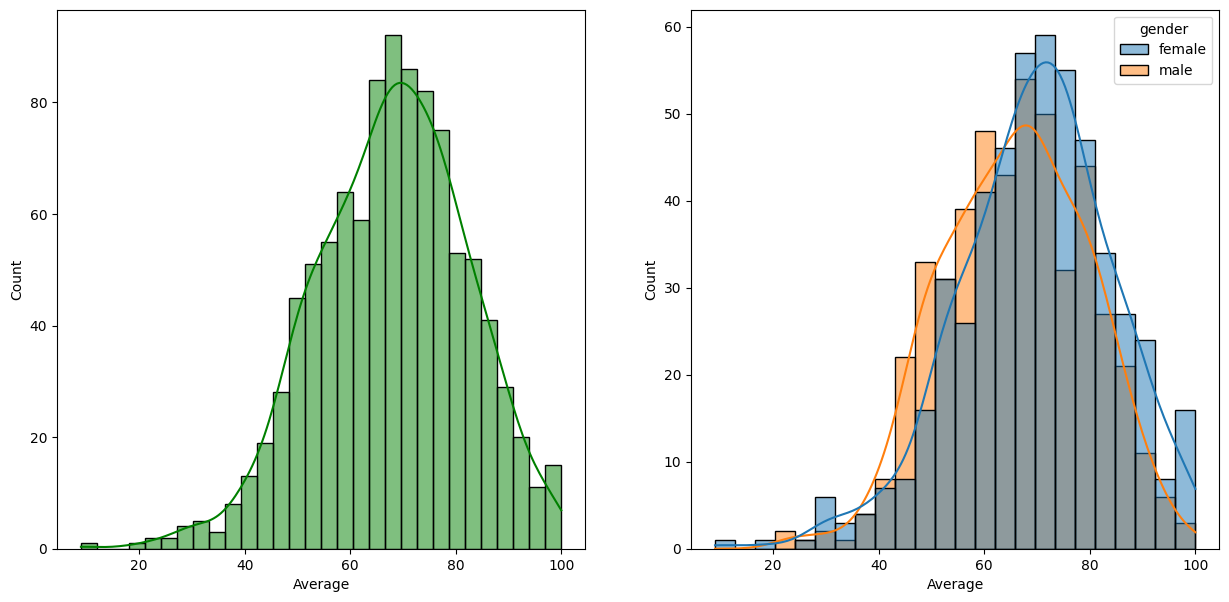

In [17]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

<Axes: xlabel='Average', ylabel='Count'>

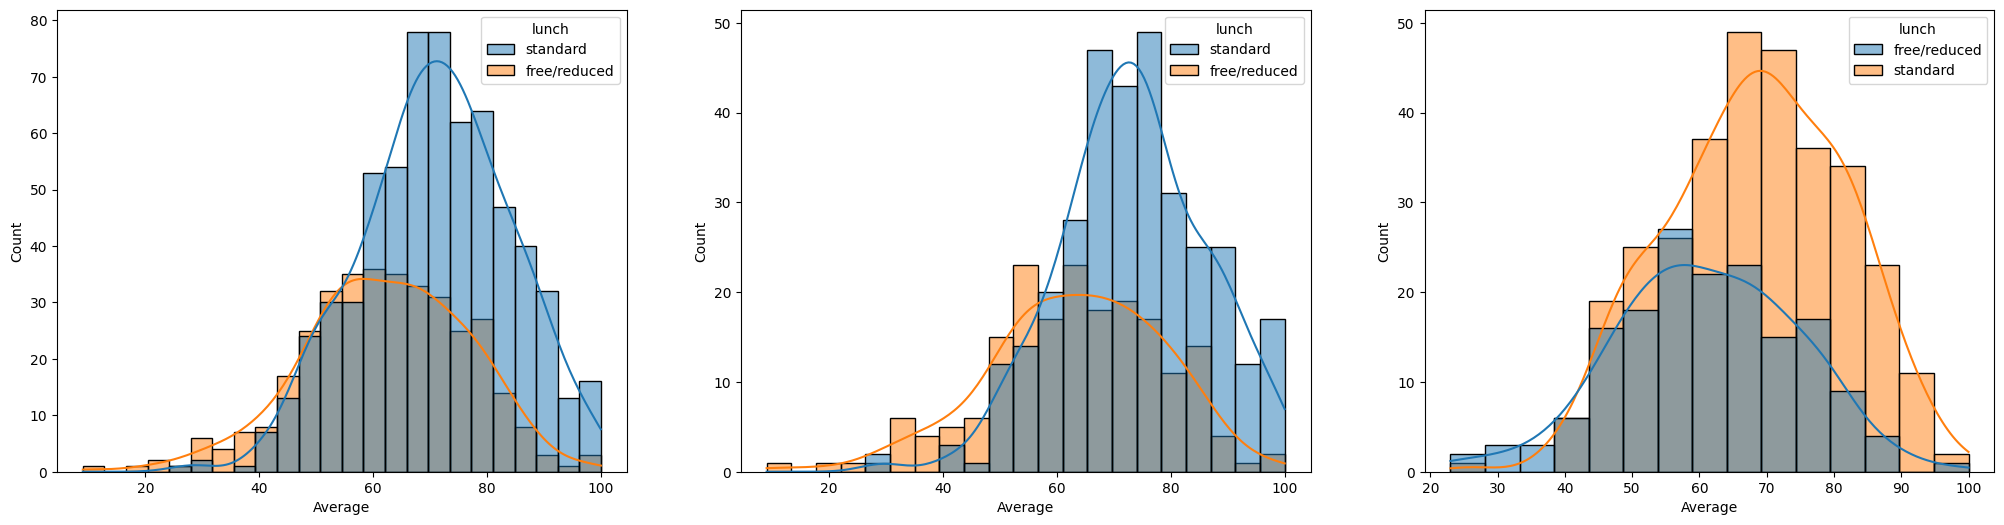

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')

#### standart lunch helps them perform better

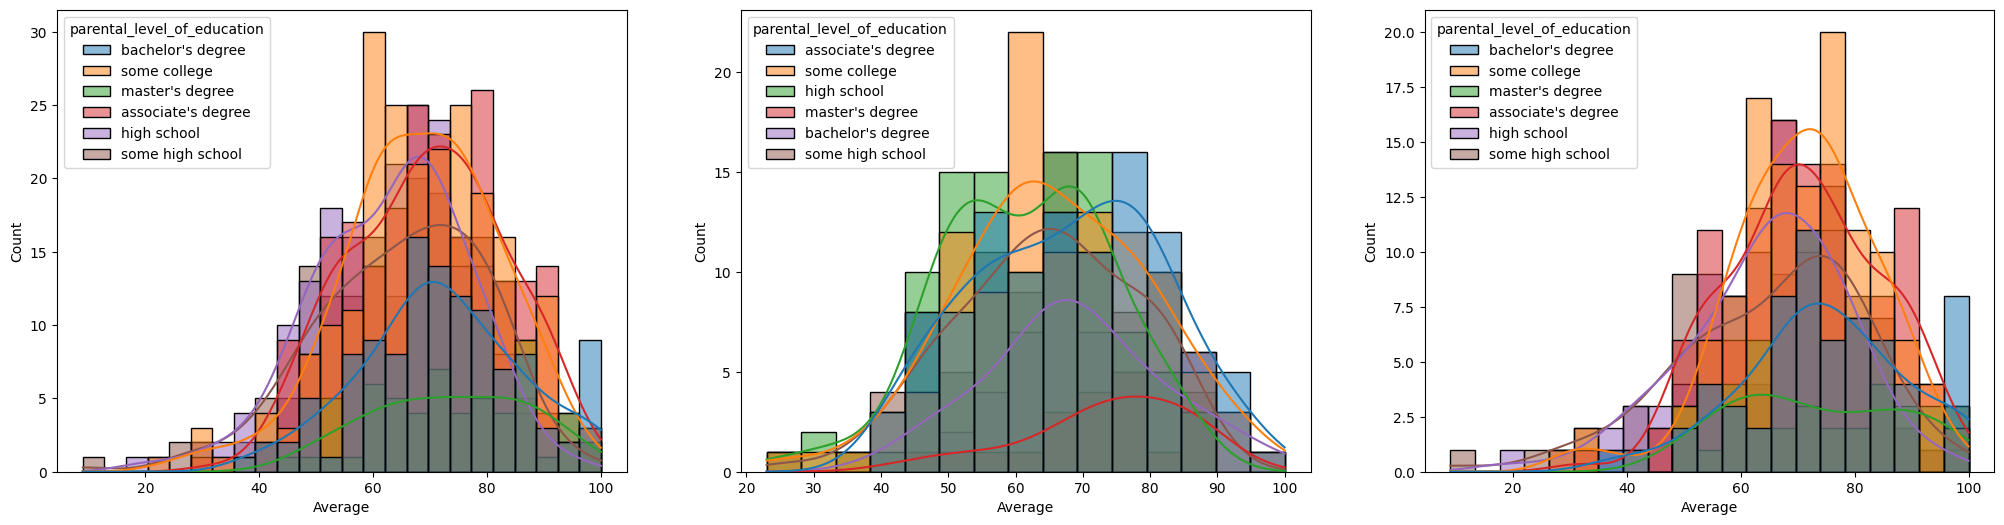

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


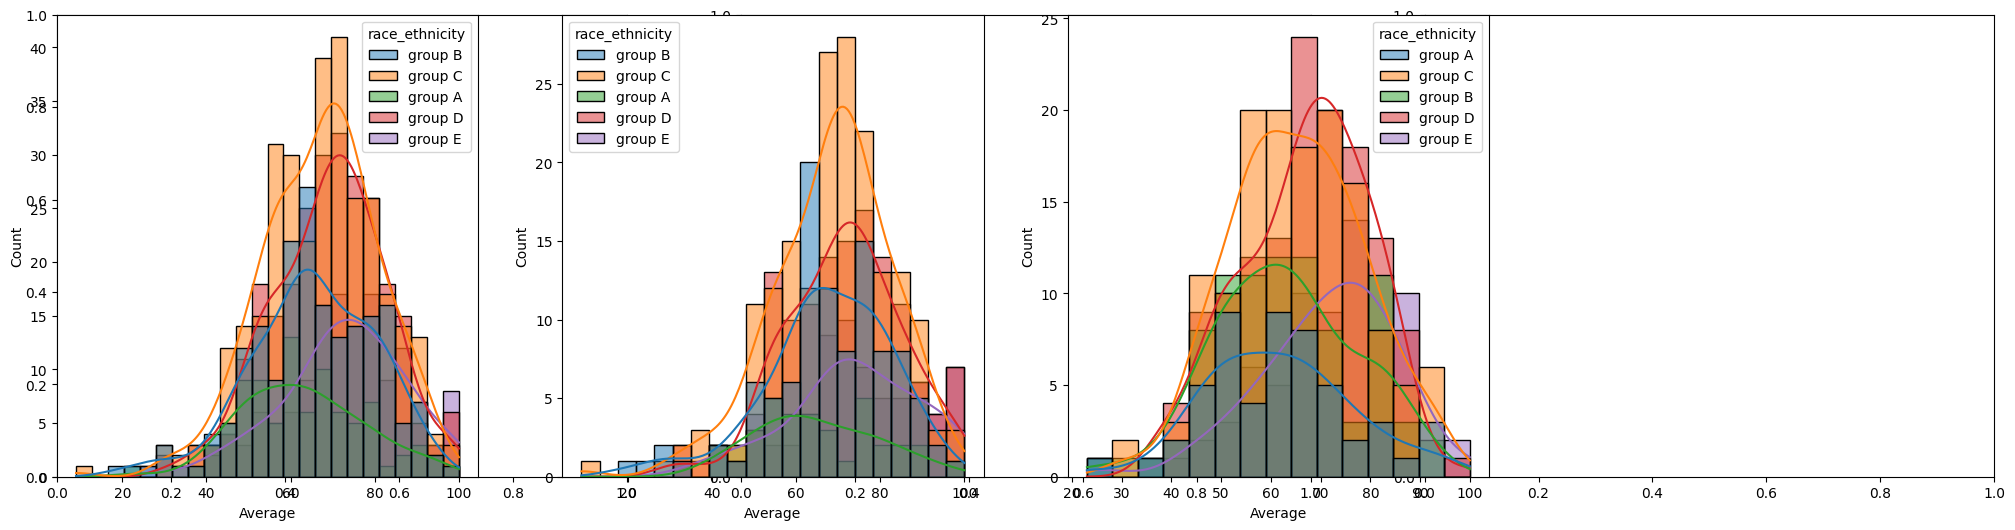

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

#### group A and group B perform poorly in exam 

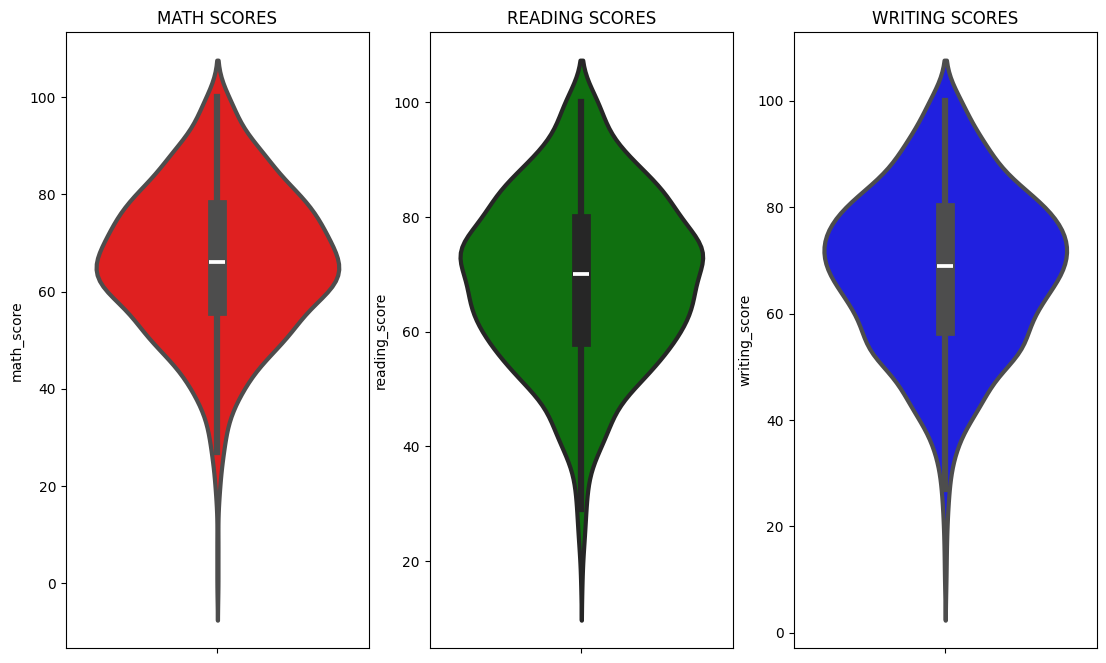

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### mostly scored betweenn 50-80

In [23]:
print('categorries in gender variable:   ')
print(df['gender'].unique())

print('categorries in race_ethnicity variable:   ')
print(df['race_ethnicity'].unique())

print('categorries in parental_level_of_education variable:   ')
print(df['parental_level_of_education'].unique())

print('categorries in lunch variable:   ')
print(df['lunch'].unique())

print('categorries in test_preparation_course variable:   ')
print(df['test_preparation_course'].unique())

categorries in gender variable:   
['female' 'male']
categorries in race_ethnicity variable:   
['group B' 'group C' 'group A' 'group D' 'group E']
categorries in parental_level_of_education variable:   
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categorries in lunch variable:   
['standard' 'free/reduced']
categorries in test_preparation_course variable:   
['none' 'completed']


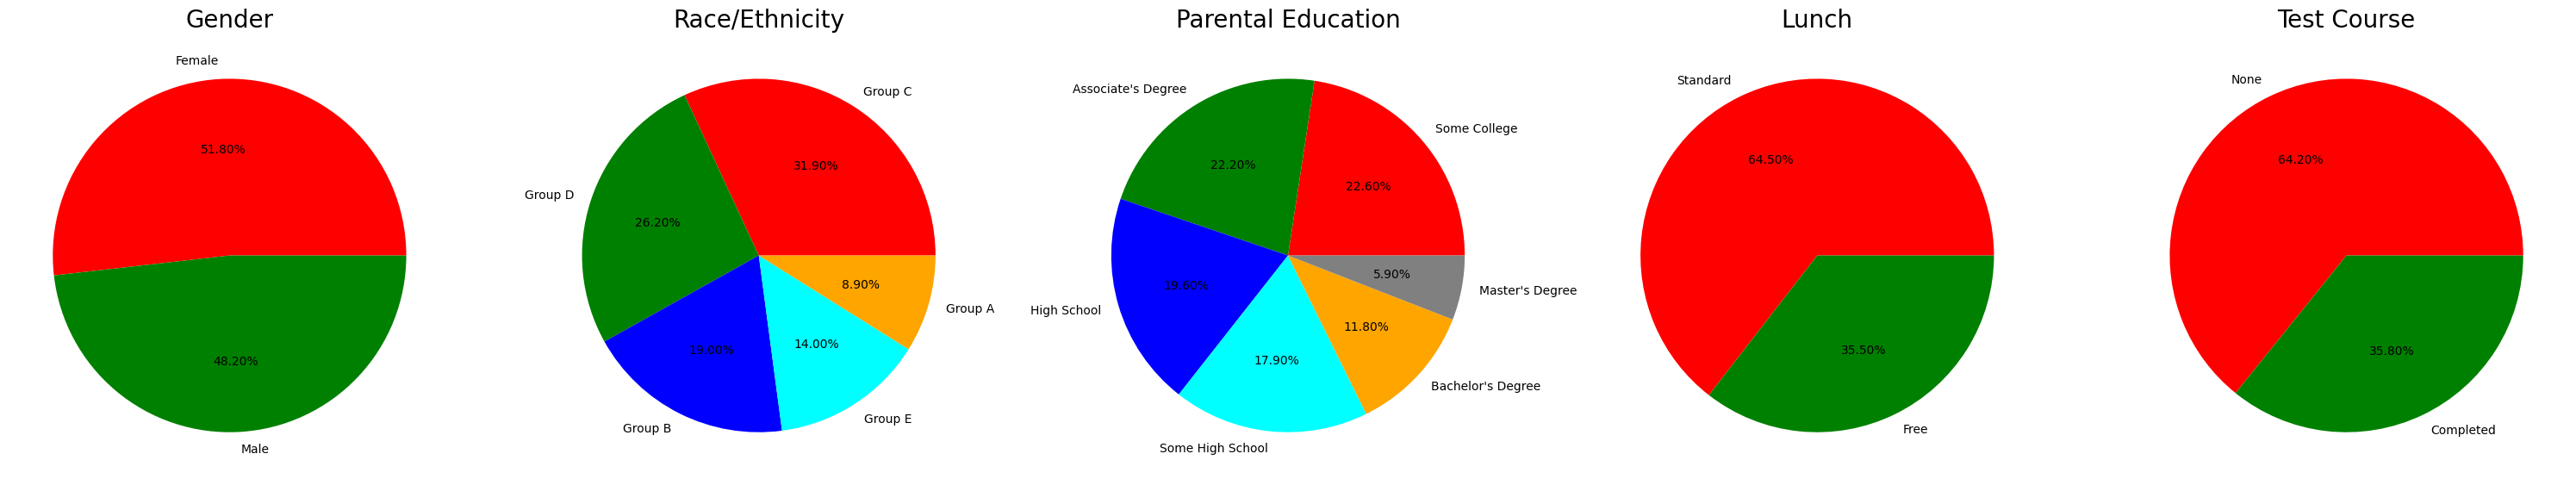

In [24]:
plt.rcParams['figure.figsize'] = (30, 12)

# Gender
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ['Female','Male']
colors = ['red','green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C','Group D','Group B','Group E','Group A']
colors = ['red','green','blue','cyan','orange']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['parental_level_of_education'].value_counts()
labels = ["Some College","Associate's Degree","High School","Some High School","Bachelor's Degree","Master's Degree"]
colors = ['red','green','blue','cyan','orange','grey']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = ['Standard','Free']
colors = ['red','green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['test_preparation_course'].value_counts()
labels = ['None','Completed']
colors = ['red','green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


### male and female almost equal (F>M)
### G(C)>G(D)>G(B)>G(E)>G(A)
### SOME CLLG>ASSOCIATE>HIGH SCHOOL>SOME HS>BACHELORS>MASTERS
### Standard is more
### test course not enrolled by many students

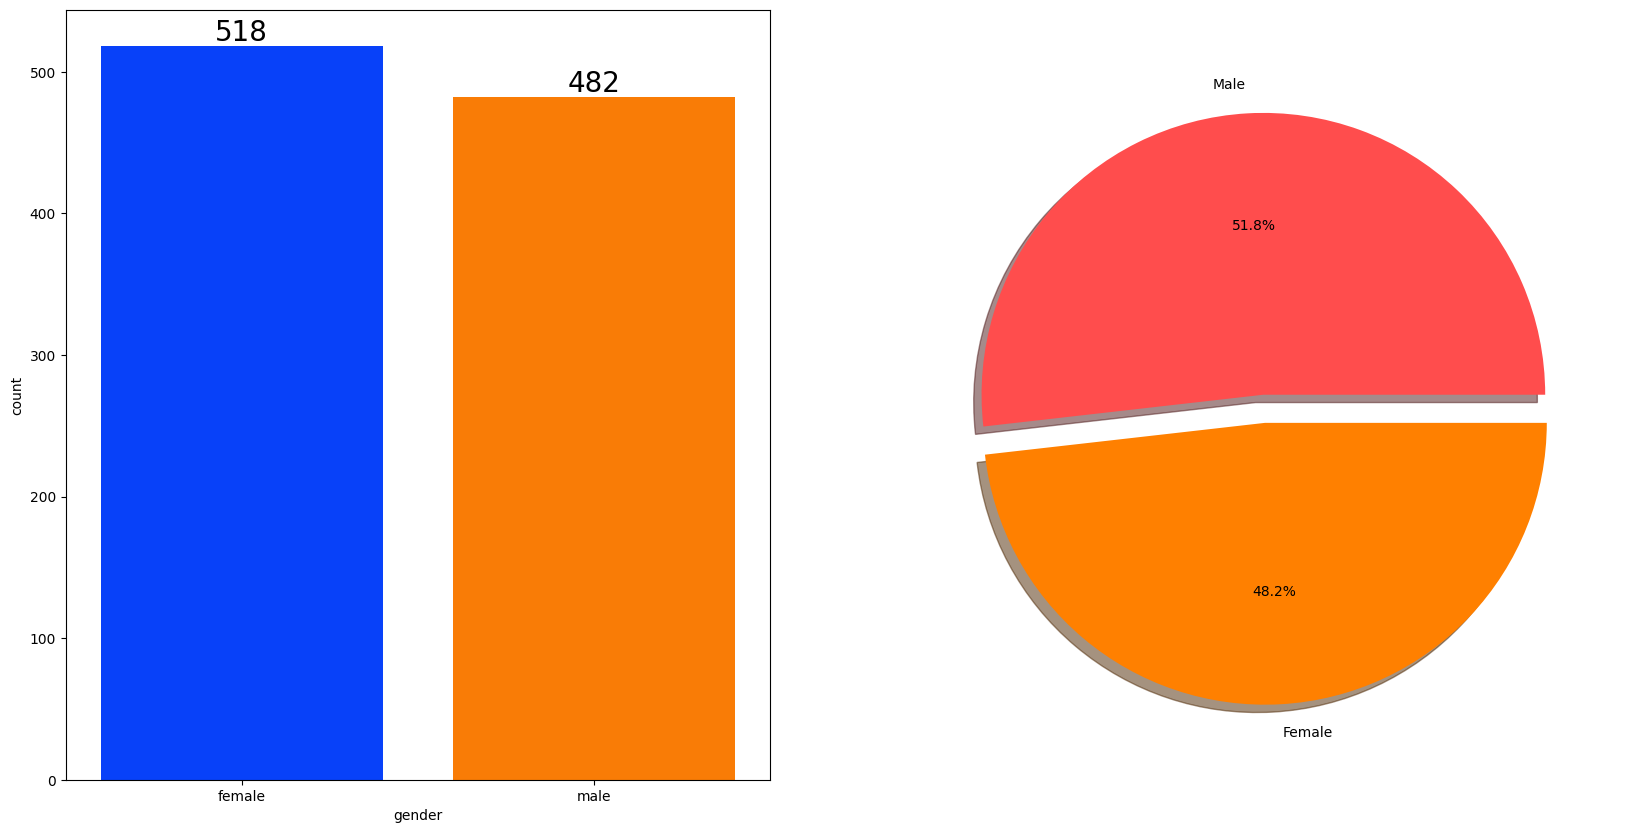

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### checking outliers

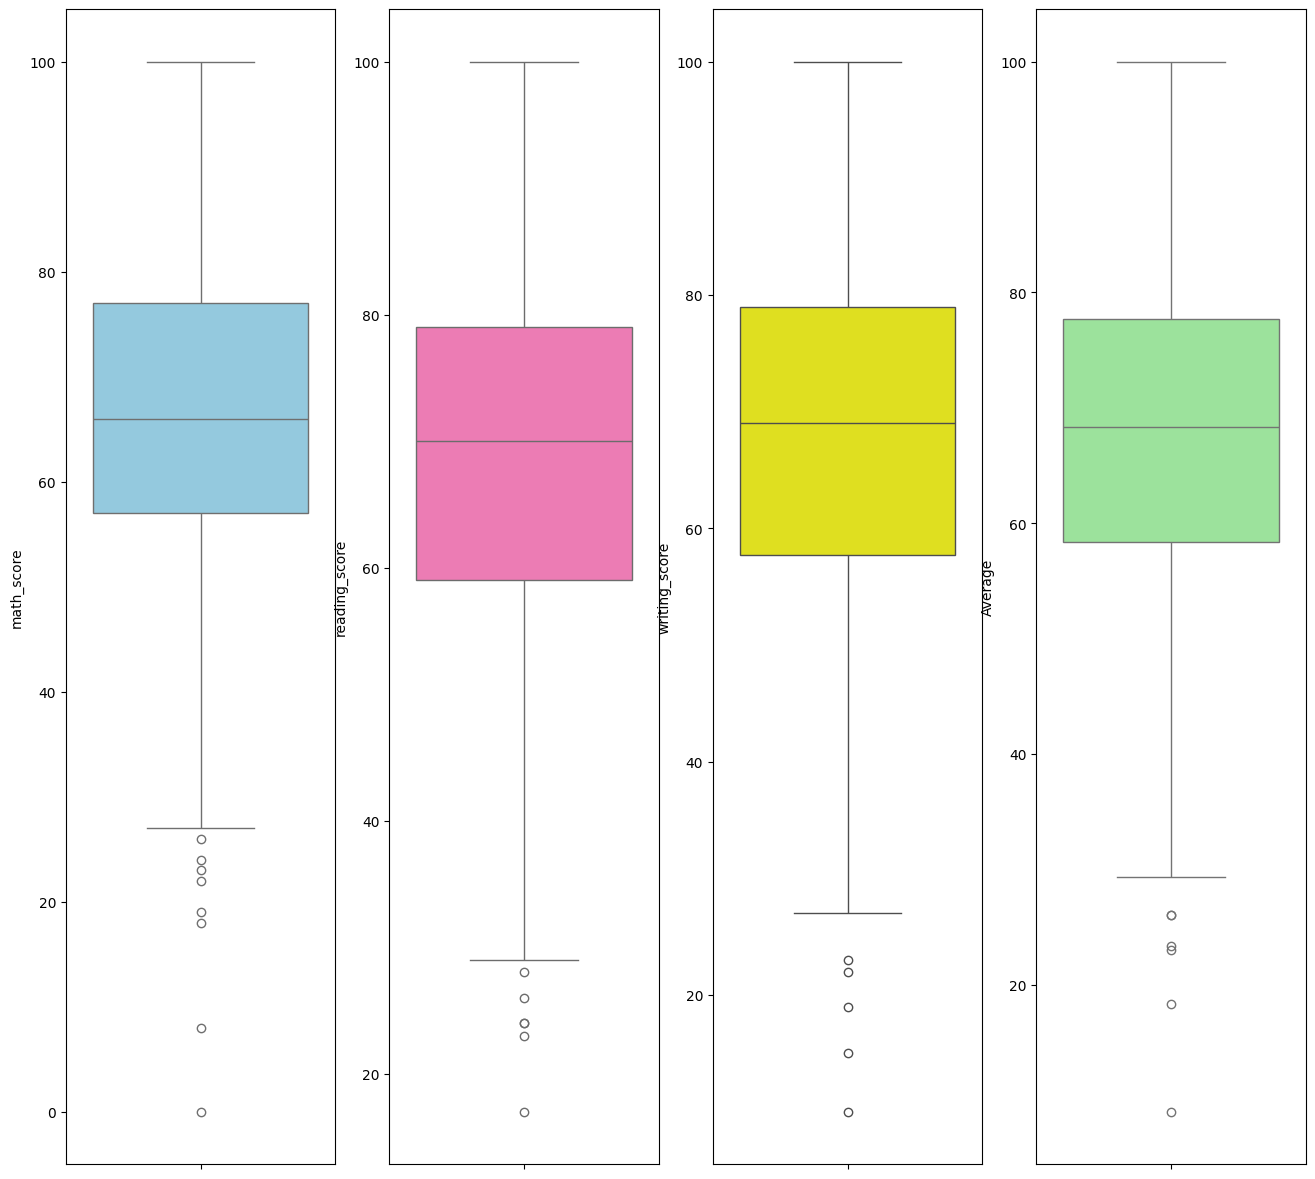

In [26]:
plt.subplots(1,4,figsize=(16,15))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()


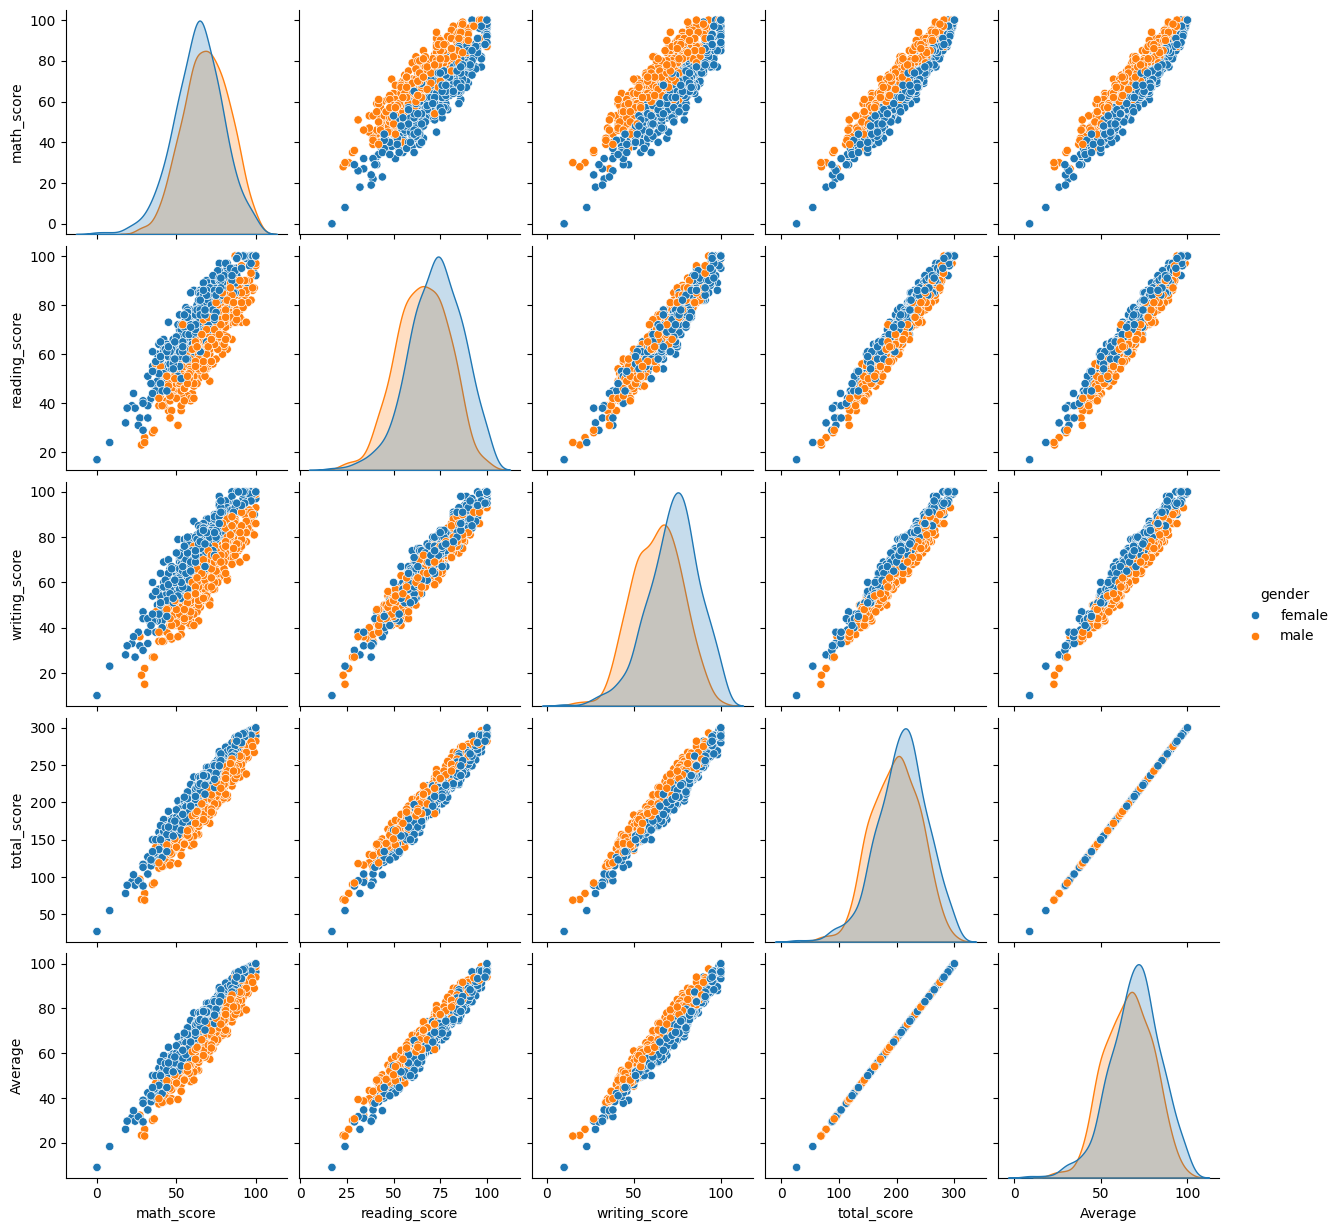

In [27]:
sns.pairplot(df,hue = 'gender')
plt.show()